# Workshop 04
## Boundary value problems and systems of ordinary differential equations 

------------


### 1. Find numerical solutions to the predator-prey system:
$$\begin{align} 
R^{\prime} &= 6R -3RW, \\
W^{\prime} &=  -2W + 5RW,
\end{align}$$
where $R(0) = 100$ and $W(0) = 55$.


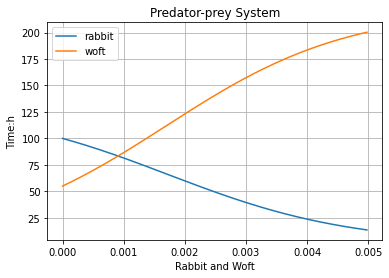

In [50]:
import numpy as np
import matplotlib.pyplot as plt
def RKO4(func, h, r, w):
        k1r, k1w = func(r, w)
        k2r, k2w = func(r + 0.5*h*k1r, w + 0.5*h*k1w)
        k3r, k3w = func(r + 0.5*h*k2r, w + 0.5*h*k2w)
        k4r, k4w = func(r + h*k3r, w + 0.5*h*k3w)
        yr = r + (h/6)*(k1r + 2*k2r + 2*k3r + k4r)
        yw = w + (h/6)*(k1w + 2*k2w + 2*k3w + k4w)
        return yr, yw
def PREsystem(r,w):
    dr = 6*r - 3*r*w
    dw = -2*w + 5*r*w
    return dr, dw
tstart = 0
tend = 0.005
h = 0.0000100
time = int(np.floor((tend - tstart)/h))
r = [None]*time
w = [None]*time
t = [None]*time  
r[0], w[0], t[0] = 100, 55, 0
for i in range(time-1):
    r[i+1], w[i+1] = RKO4(func=PREsystem, h=h, r=r[i], w=w[i])
    t[i + 1] = h + t[i]
plt.title("Predator-prey System")
plt.plot(t, r, label='rabbit')
plt.xlabel("Rabbit and Woft")
plt.ylabel("Time:h")
plt.plot(t, w, label='woft')
plt.legend()
plt.grid()
plt.show()

In [140]:
def rk4(f=None, ini=None, h=0.01, start=0, stop=1, stopint=False, *args, **kwargs): #integrator
    t = np.arange(start, stop+h, h)
    row = len(t)
    try:
        var = len(ini)
    except TypeError:
        var = 1
    x = np.zeros((row, var))
    x[0, :] = ini
    for j in range(0, len(t)-1):
        k1 = f(t[j], x[j], *args, **kwargs)
        k2 = f(t[j] + 0.5*h, x[j] +0.5*h*k1, *args, **kwargs)
        k3 = f(t[j] + 0.5*h, x[j] + 0.5*h*k2, *args, **kwargs)
        k4 = f(t[j] + h, x[j] + h*k3, *args, **kwargs)
        x[j+1, :] = x[j] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        if stopint:
            candidate = x[j+1, :]
            for i in range(var):
                if candidate[i] < 1 : candidate[i] = 0
            x[j+1, :] = candidate
    return t, x

In [141]:
def predprey(t, x=None):
    R = x[0]
    W = x[1]
    Rprime = 6*R - 3*R*W
    Wprime = -2*W + 5*R*W
    return np.array([Rprime, Wprime])

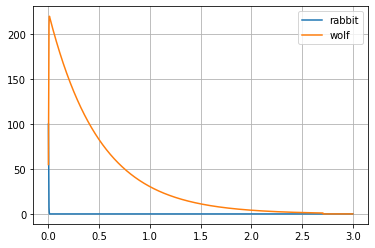

In [142]:
ini = np.array([100,55])
t, x = rk4(f=predprey, ini=ini, stopint=True, h=0.001, stop=3)
R = x[:, 0]
W = x[:, 1]
plt.plot(t, R, label='rabbit')
plt.plot(t, W, label='wolf')
plt.grid()
plt.legend()
plt.show()

-----------------

### 2. Find numerical solutions to the Lotka-Volterra equations:
$$\begin{align} 
x^{\prime} &= \alpha x - \beta xy, \\
y^{\prime} &=  -\gamma y + \delta xy,
\end{align}$$
where all parameters are non-negative and initial conditions are $x(0) = x_0 \in \mathbb{R}$ and $y(0) = y_0 \in \mathbb{R}$.


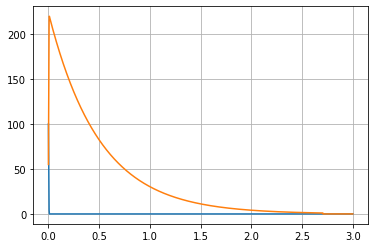

In [143]:
def Lotka_Vikterra(t, s, *args, **kwargs):
    x = s[0]
    y = s[1]
    alpha = kwargs['alpha']
    beta = kwargs['beta']
    gramma = kwargs['gramma']
    delta = kwargs['delta']
    xdot = alpha*x - beta*x*y
    ydot = -gramma*y + delta*x*y 
    return np.array([xdot, ydot])
t, x = rk4(f=Lotka_Vikterra, ini=np.array([100,55]), 
               stop=3, stopint=True, h=0.0001, 
               alpha=6, beta=3, gramma=2, delta=5)
xlist = x[:, 0]
ylist = x[:, 1]
plt.plot(t, xlist)
plt.plot(t, ylist)
plt.grid()
plt.show()

------------------

### 3. Find numerical solutions to the SIR model for spread of disease:
$$\begin{align} 
S^{\prime} &= -\beta SI + \delta R, \\
I^{\prime} &=  \beta SI - \gamma I, \\
R^{\prime} &=  \gamma I - \delta R
\end{align}$$
where all parameters are non-negative and initial conditions are $S(0) = S_0 \in \mathbb{R}, I(0) = I_0 \in \mathbb{R} $ and $R(0) = R_0 \in \mathbb{R}$.

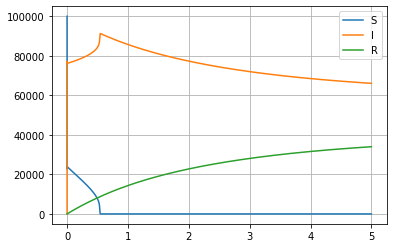

In [188]:
def SIR(t, s, *args, **kwargs):
    S = s[0]
    I = s[1]
    #R = s[2]
    beta = kwargs['beta']
    delta = kwargs['delta']
    gramma = kwargs['gramma']
    n = kwargs['n']
    Sdot = -beta*S*I + delta*(n - S - I)
    Idot = beta*S*I - gramma*I
    #Rdot = gramma*I - delta*R
    return np.array([Sdot,Idot])
ini = np.array([99950,50])
n = np.sum(ini)
t, x = rk4(f=SIR, ini=ini, h=0.0001, stop=5, beta=0.3, delta=0.5, gramma=0.2, stopint=True, n=n)
slist = x[:, 0]
ilist = x[:, 1]
rlist = n - slist - ilist
plt.plot(t, slist, label='S')
plt.plot(t, ilist, label='I')
plt.plot(t, rlist, label='R')
plt.legend()
plt.grid()
plt.show()

-------------

### 4. Find numerical solutions to the Lorenz system:
$$\begin{align} 
x^{\prime} &= \delta(y-x), \\
y^{\prime} &=  x(\rho-z)-y, \\
z^{\prime} &= xy - \beta z
\end{align}$$
where all parameters are non-negative and initial conditions are $x(0) = x_0 \in \mathbb{R}, y(0) = y_0 \in \mathbb{R} $ and $z(0) = z_0 \in \mathbb{R}$.

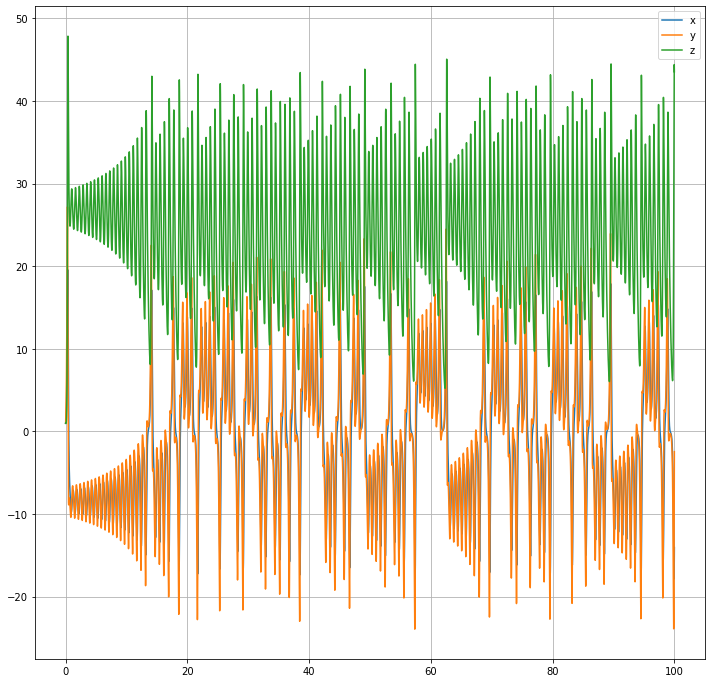

In [193]:
def lorenz_system(t, s, *args, **kwargs):
    x = s[0]
    y = s[1]
    z = s[2]
    delta = kwargs['delta']
    pho = kwargs['pho']
    beta = kwargs['beta']
    xdot = delta*(y - x)
    ydot = x*(pho - z) - y
    zdot = x*y - beta*z
    return np.array([xdot, ydot, zdot])
t, x = rk4(f=lorenz_system, ini=np.array([1,1,1]), h=0.001, stop=100, delta=10, pho=28, beta=8/3)
xlist = x[:, 0]
ylist = x[:, 1]
zlist = x[:, 2]
plt.figure(figsize=(12,12))
plt.plot(t, xlist, label='x')
plt.plot(t, ylist, label='y')
plt.plot(t, zlist, label='z')
plt.legend()
plt.grid()
plt.show()

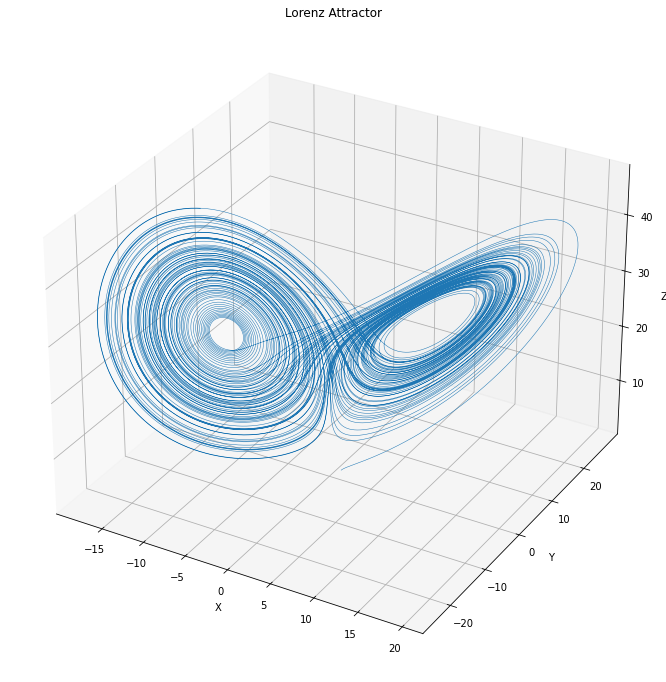

In [163]:
ax = plt.figure(figsize=(12,12)).add_subplot(projection='3d')

ax.plot(xlist, ylist, zlist, lw=0.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Lorenz Attractor")
plt.show()

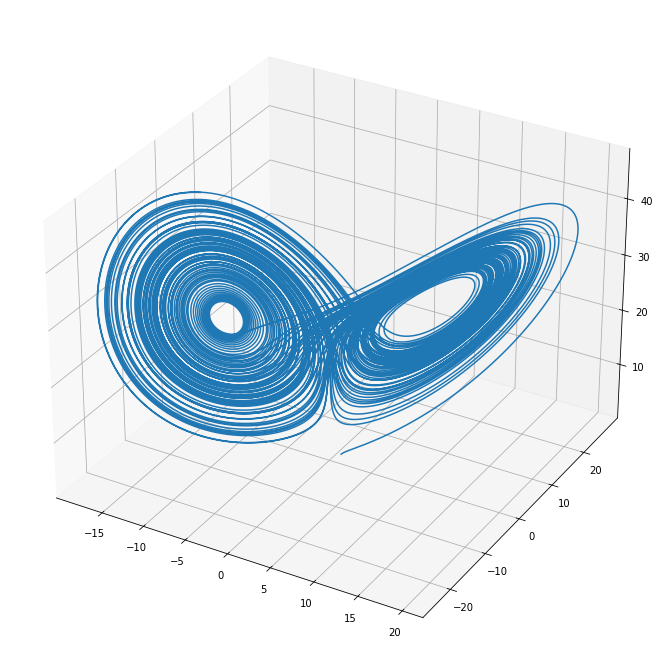

In [197]:
plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.plot3D(xlist, ylist, zlist);

-------------

### 5. Find numerical solution to the differential equation which represents the motion of a simple pendulum
$$ \dfrac{\mathrm{d}^2\theta}{\mathrm{d}t^2} + \dfrac{g}{l}\sin(\theta) = 0 $$
where $g$ is the magnitude of the gravitational field, $l$ is the length of the rod or cord, and $\theta$ is the angle from the vertical to the pendulum.

<img src='pendulum.gif'>

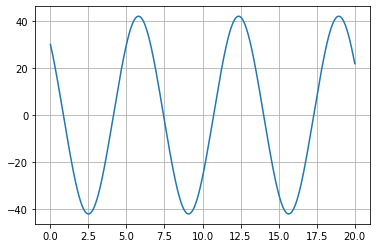

In [215]:
def pendulum(t, s, *args, **kwargs):
    x1 = s[0]
    x2 = s[1]
    g = kwargs['g']
    l = kwargs['l']
    x1dot = x2 
    x2dot = (-g/l)*np.sin(x1)
    return np.array([x1dot, x2dot])
t, mylist = rk4(f=pendulum, ini=np.array([np.pi/6, np.pi/6]), 
               g = 9.8, l = 10, stop=20)
theta = mylist[:, 1]
plt.plot(t, (theta*180/np.pi))
plt.grid()
plt.show()

--------------

-------------------------

<font size=2>

#### Update list

| Date      | Commit Message      |      by      |
|:----------|:--------------------|-------------:|
| 2023/12/24| Initial created     | R. Promkam   |

</font>

-------------------------
<p style="text-align: center;"><font size=1>All rights reserved. This document, figures and data are published under MIT License.</font></p>